In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/happiness-dataset/happiness-new-QueryResult.csv


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('../input/happiness-dataset/happiness-new-QueryResult.csv')
df

,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia_residual
0,Nepal,South Asia,5.269,0.070,5.406,5.132,8.120,0.774,64.233,0.782,0.152,0.727,2.43,0.519,0.702,0.496,0.488,0.287,0.135,2.642
1,Maldives,South Asia,5.198,0.072,5.339,5.057,9.826,0.913,70.600,0.854,0.024,0.825,2.43,1.115,1.015,0.697,0.575,0.204,0.073,1.520
2,Bangladesh,South Asia,5.025,0.046,5.115,4.934,8.454,0.693,64.800,0.877,-0.041,0.682,2.43,0.635,0.520,0.514,0.603,0.161,0.164,2.427
3,Pakistan,South Asia,4.934,0.068,5.066,4.802,8.458,0.651,58.709,0.726,0.098,0.787,2.43,0.637,0.423,0.322,0.418,0.252,0.097,2.784
4,Sri Lanka,South Asia,4.325,0.066,4.454,4.196,9.470,0.827,67.299,0.841,0.079,0.863,2.43,0.990,0.820,0.593,0.559,0.239,0.049,1.075
5,India,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,60.633,0.893,0.089,0.774,2.43,0.741,0.316,0.383,0.622,0.246,0.106,1.405
6,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [6]:
df.dropna

<bound method DataFrame.dropna of   country_name regional_indicator  ladder_score  \
0        Nepal         South Asia         5.269   
1     Maldives         South Asia         5.198   
2   Bangladesh         South Asia         5.025   
3     Pakistan         South Asia         4.934   
4    Sri Lanka         South Asia         4.325   
5        India         South Asia         3.819   
6  Afghanistan         South Asia         2.523   

   standard_error_of_ladder_score  upperwhisker  lowerwhisker  \
0                           0.070         5.406         5.132   
1                           0.072         5.339         5.057   
2                           0.046         5.115         4.934   
3                           0.068         5.066         4.802   
4                           0.066         4.454         4.196   
5                           0.026         3.869         3.769   
6                           0.038         2.596         2.449   

   logged_gdp_per_capita  social_sup

In [8]:
df.describe

<bound method NDFrame.describe of   country_name regional_indicator  ladder_score  \
0        Nepal         South Asia         5.269   
1     Maldives         South Asia         5.198   
2   Bangladesh         South Asia         5.025   
3     Pakistan         South Asia         4.934   
4    Sri Lanka         South Asia         4.325   
5        India         South Asia         3.819   
6  Afghanistan         South Asia         2.523   

   standard_error_of_ladder_score  upperwhisker  lowerwhisker  \
0                           0.070         5.406         5.132   
1                           0.072         5.339         5.057   
2                           0.046         5.115         4.934   
3                           0.068         5.066         4.802   
4                           0.066         4.454         4.196   
5                           0.026         3.869         3.769   
6                           0.038         2.596         2.449   

   logged_gdp_per_capita  social_sup

In [40]:
selected_col=['country_name','ladder_score','logged_gdp_per_capita','social_support','healthy_life_expectancy','perceptions_of_corruption','regional_indicator']
selected_col

['country_name',
 'ladder_score',
 'logged_gdp_per_capita',
 'social_support',
 'healthy_life_expectancy',
 'perceptions_of_corruption',
 'regional_indicator']

In [41]:
data=df[selected_col].copy()
data


,country_name,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,perceptions_of_corruption,regional_indicator
0,Nepal,5.269,8.120,0.774,64.233,0.727,South Asia
1,Maldives,5.198,9.826,0.913,70.600,0.825,South Asia
2,Bangladesh,5.025,8.454,0.693,64.800,0.682,South Asia
3,Pakistan,4.934,8.458,0.651,58.709,0.787,South Asia
4,Sri Lanka,4.325,9.470,0.827,67.299,0.863,South Asia
5,India,3.819,8.755,0.603,60.633,0.774,South Asia
6,Afghanistan,2.523,7.695,0.463,52.493,0.924,South Asia


In [42]:
corr=data.corr()
corr

,ladder_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,perceptions_of_corruption
ladder_score,1.000000,0.431049,0.776882,0.752666,-0.710299
logged_gdp_per_capita,0.431049,1.000000,0.808291,0.828318,0.067990
social_support,0.776882,0.808291,1.000000,0.962643,-0.237025
healthy_life_expectancy,0.752666,0.828318,0.962643,1.000000,-0.352350
perceptions_of_corruption,-0.710299,0.067990,-0.237025,-0.352350,1.000000


<AxesSubplot:xlabel='ladder_score', ylabel='logged_gdp_per_capita'>

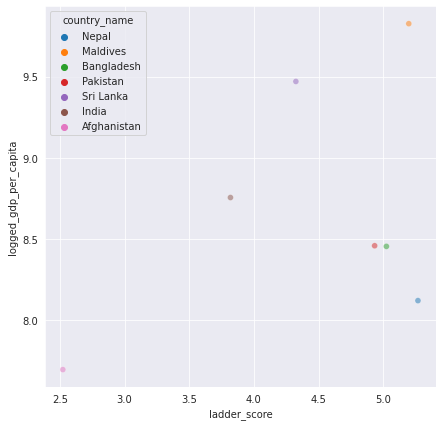

In [46]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x='ladder_score',y='logged_gdp_per_capita',hue='country_name',alpha=0.5)

<AxesSubplot:>

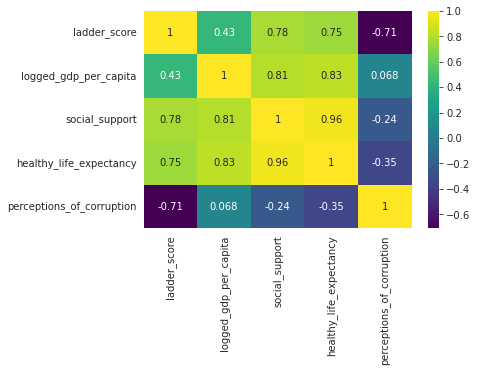

In [62]:
sns.heatmap(corr,annot=True,cmap='viridis')

Text(0.5, 1.0, 'lile-expectancy')

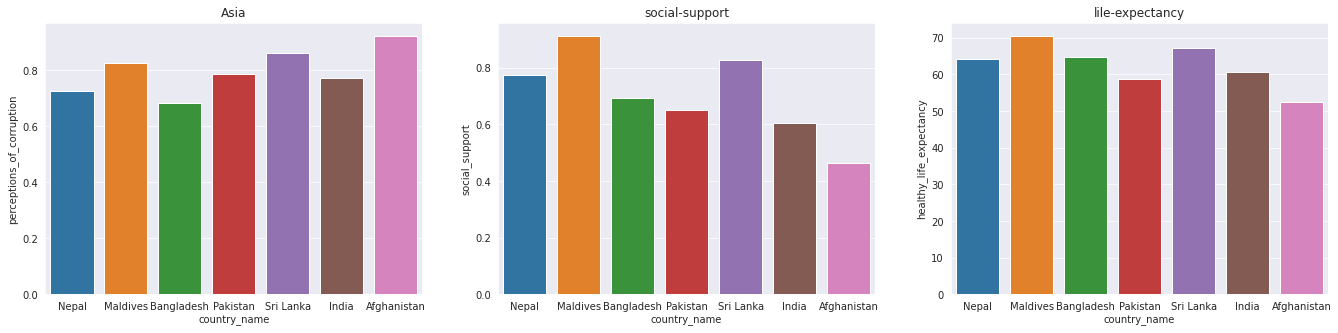

In [66]:
fig,axes=plt.subplots(1,3,figsize=(23,5))
axes[0].set_title("Asia")


sns.barplot(ax=axes[0],x='country_name',y='perceptions_of_corruption',data=data)
sns.barplot(ax=axes[1],x='country_name',y='social_support',data=data)
axes[1].set_title("social-support")
sns.barplot(x='country_name',y='healthy_life_expectancy',data=data)
axes[2].set_title('lile-expectancy')

In [96]:
med=data.median()
med

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ladder_score                  4.934
logged_gdp_per_capita         8.458
social_support                0.693
healthy_life_expectancy      64.233
perceptions_of_corruption     0.787
dtype: float64